<a href="https://www.kaggle.com/code/calwin9/publication-analysis?scriptVersionId=145902584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sustainable-management-publication/sustainable managemet dataset.csv


<a id = "analysis"></a>
<h1 style="color:#496595">Publication Analysis  📘📈🔏📝🎓📚</h1>


<a id = "link"></a>
##### Quick Link

[📘 About the Dataset](#dataset)<br>
[📈 Analysis: Publications by Year](#year)<br>
[🔏 Analysis: Top Keywords Used by Published Articles](#keywords1)<br>
[🔏 Analysis: Top Keywords Used by Published Articles (2015-2019)](#keywords2)<br>
[📝 Analysis: Top Cited Articles (2015-2019)](#articles)<br>
[🎓 Analysis: Top Cited Scholars](#scholars)<br>
[📚 Analysis: Top Cited Journals](#journals)<br>

<img src="https://plus.unsplash.com/premium_photo-1676422355165-d809008b8342?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1998&q=80" width="500"/>

test Market analysis plays a crucial role in the development of publishers. Editors, often with a relevant academic background, are instrumental in analyzing ongoing trends in academic research. They work alongside board members to shape the scope of upcoming volumes or new journal publications, especially when new subjects of interest arise.

<a id = "dataset"></a>
<h2 style="color:#496595">📘 About the Dataset</h2>

This notebook utilizes the [Sustainable Management Publication](https://www.kaggle.com/datasets/saurabhshahane/sustainable-management-publication/data) dataset sourced from [Kaggle](https://www.kaggle.com/). The dataset encompasses publication records of articles indexed in [Scopus](https://www.scopus.com/home.uri?zone=header&origin=), specifically focusing on the subject area of sustainable management. It spans from the year 1992 to 2019, providing a comprehensive view of research contributions within this field over nearly three decades.

The dataset contains data authors, authors ID Scopus, title, year, source title, volume, issue, article number in Scopus, DOI, link, affiliation, abstract, index keywords, references, correspondence address, editors, publisher, conference name, conference date, conference code, ISSN, language, document type, access type, and EID.

Within the dataset, each publication entry may involve multiple authors, each identified by their respective author ID and affiliation. In cases where all authors share a common affiliation, only one affiliation is recorded.

<h3>Import libraries</h3>

In [2]:
# !pip install ipython-sql # install sql extension
%load_ext sql
import sqlite3
import numpy as np
import pandas as pd
import missingno as mn
import plotly.express as px
import plotly.graph_objects as go

<h3>Load data</h3>

In [3]:
df = pd.read_csv('/kaggle/input/sustainable-management-publication/sustainable managemet dataset.csv')

<h3>Data exploration and preparation</h3>

In [4]:
# Check DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        903 non-null    object 
 1   Author(s) ID                   903 non-null    object 
 2   Title                          903 non-null    object 
 3   Year                           903 non-null    int64  
 4   Source title                   903 non-null    object 
 5   Volume                         765 non-null    object 
 6   Issue                          533 non-null    object 
 7   Art. No.                       50 non-null     object 
 8   Page start                     843 non-null    float64
 9   Page end                       836 non-null    object 
 10  Page count                     7 non-null      float64
 11  Cited by                       677 non-null    float64
 12  DOI                            731 non-null    obj

In [5]:
# Check for duplicated entries
df.duplicated().sum()

0

In [6]:
# Check the percentage of missing values
round(df.isnull().sum()/df.isnull().count() * 100, 2)

Authors                            0.00
Author(s) ID                       0.00
Title                              0.00
Year                               0.00
Source title                       0.00
Volume                            15.28
Issue                             40.97
Art. No.                          94.46
Page start                         6.64
Page end                           7.42
Page count                        99.22
Cited by                          25.03
DOI                               19.05
Link                               0.00
Affiliations                       2.99
Authors with affiliations          0.55
Abstract                           0.00
Author Keywords                   17.83
Index Keywords                    46.29
Molecular Sequence Numbers       100.00
Chemicals/CAS                     98.12
Tradenames                       100.00
Manufacturers                    100.00
Funding Details                   74.75
Funding Text 1                    70.32


<Axes: >

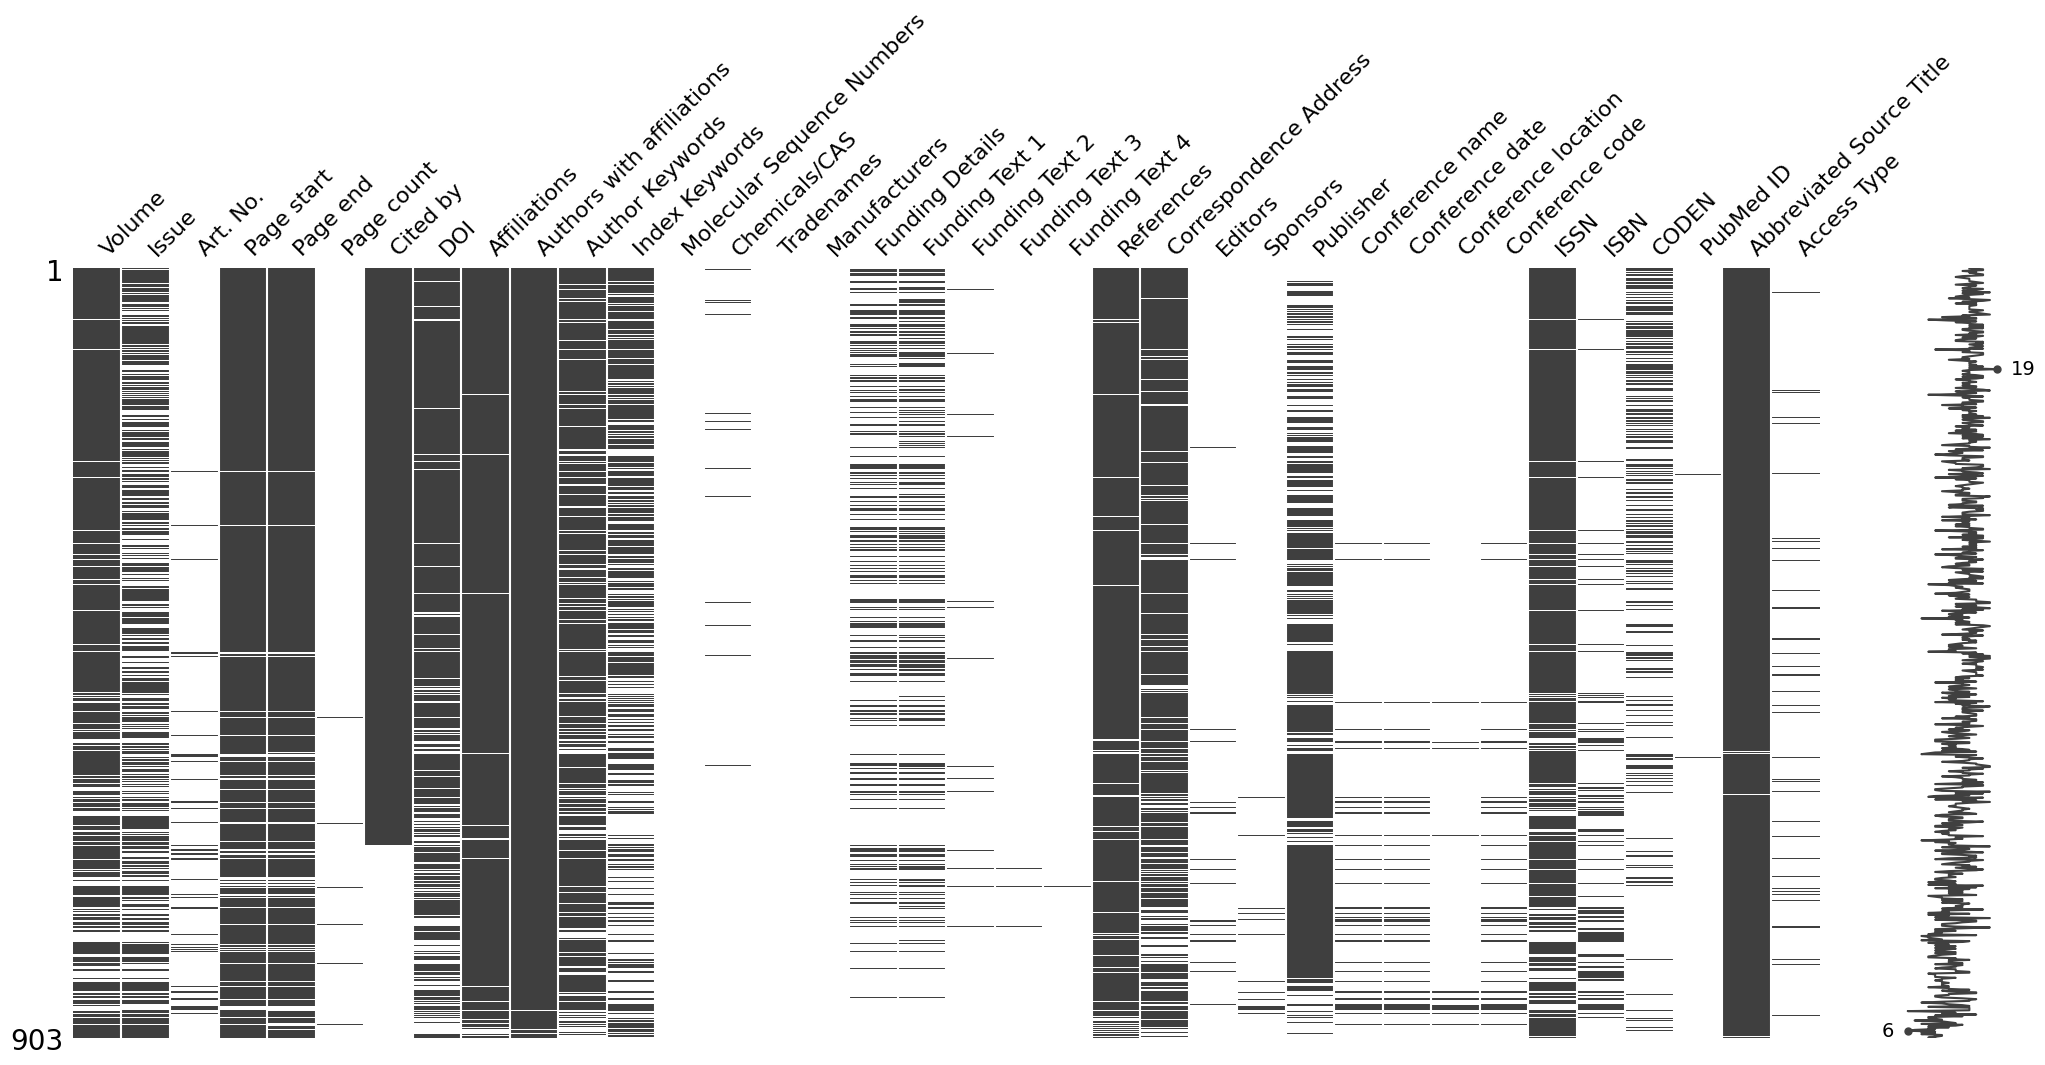

In [7]:
# Check the pattern of missing values
null_cols = [i for i in df.columns if df[i].isnull().any()]
mn.matrix(df[null_cols])

In [8]:
# Select relevant data with low percentage of missing values
scopus_data = df[[
    'Authors', 
'Author(s) ID', 
'Title', 
'Year', 
'Source title', 
'Volume', 
'Page start', 
'Page end', 
'Cited by',
'Link', 
'Affiliations', 
'Author Keywords', 
'Document Type'
]]
scopus_data = scopus_data.dropna() # Drop data for data completeness
scopus_data = scopus_data.sort_values(by='Year', ascending=False)
scopus_data

,Authors,Author(s) ID,Title,Year,Source title,Volume,Page start,Page end,Cited by,Link,Affiliations,Author Keywords,Document Type
230,"De Carvalho Gomes S., Zhou J.L., Li W., Long G.",57207111955;15739025600;36721486200;7402510538;,Progress in manufacture and properties of cons...,2019,"Resources, Conservation and Recycling",145,148.0,159,13.0,https://www.scopus.com/inward/record.uri?eid=2...,"School of Civil and Environmental Engineering,...",Construction materials; Durability; Mechanical...,Review
358,"Silvius A.J.G., de Graaf M.",24476627200;57204568805;,Exploring the project manager's intention to a...,2019,Journal of Cleaner Production,208,1226.0,1240,6.0,https://www.scopus.com/inward/record.uri?eid=2...,"LOI University of Applied Sciences, Netherland...",Project; Project management; Sustainability; T...,Article
296,"Skaf L., Buonocore E., Dumontet S., Capone R.,...",57204787893;47061068900;6701648203;56005863000...,Food security and sustainable agriculture in L...,2019,Journal of Cleaner Production,209,1025.0,1032,9.0,https://www.scopus.com/inward/record.uri?eid=2...,Laboratory of Ecodynamics and Sustainable Deve...,Agricultural systems; Environmental accounting...,Article
297,"Merli R., Preziosi M., Acampora A., Lucchetti ...",55898797000;56308556300;57200035865;5589962990...,The impact of green practices in coastal touri...,2019,International Journal of Hospitality Management,77,471.0,482,9.0,https://www.scopus.com/inward/record.uri?eid=2...,"Roma Tre University, Department of Business St...",Beach club; Behavioral intention; Coastal tour...,Article
579,"Fyall A., Garrod B.",6507171922;6601958850;,Destination management: a perspective article,2019,Tourism Review,75,165.0,169,1.0,https://www.scopus.com/inward/record.uri?eid=2...,"Rosen College of Hospitality Management, Unive...",Destination management; Planning; Policy makin...,Review
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Bach C.F.,7101613004;,Economic incentives for sustainable management...,1999,Ecological Economics,30,251.0,265,13.0,https://www.scopus.com/inward/record.uri?eid=2...,"Institute of Economics, Univ. Copenhagen, S., ...",Ghana; Incentives; Low-impact logging; Sustain...,Article
121,"Slone T.H., Orsak L.J., Malver O.",7003449995;6507935739;6506004228;,"A comparison of price, rarity and cost of butt...",1997,Ecological Economics,21,77.0,85,28.0,https://www.scopus.com/inward/record.uri?eid=2...,"Div. of Biochem. and Molec. Biology, 401 Barke...",Butterflies; Conservation; Insect trade; Papua...,Article
15,"Laarman J.G., Gregersen H.M.",7003881350;7102846205;,Pricing policy in nature-based tourism,1996,Tourism Management,17,247.0,254,104.0,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Forestry, Box 8008, North Caroli...",Contingent valuation; Fees; National parks; Pr...,Article
16,"Navrud S., Mungatana E.D.",6603500707;11739717600;,Environmental valuation in developing countrie...,1994,Ecological Economics,11,135.0,151,101.0,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Economics and Social Sciences, A...",Developing countries; Environmental valuation;...,Article


In [9]:
# Check for mismatched entry
for _, row in scopus_data.iterrows():
    scholar = row['Authors'].split(', ')
    scholar_id = row['Author(s) ID'].split(';')
    
    if len(scholar) != len(scholar_id) - 1:
        print(f"Row with mismatched scholar and scholar_id: Index {_}")
        print(f"Scholars: {scholar}")
        print(f"Scholar IDs: {scholar_id}")

Row with mismatched scholar and scholar_id: Index 103
Scholars: ['Boltz F.', 'Carter D.R.', 'Holmes T.P.', 'Pereira R.', 'Jr.']
Scholar IDs: ['6603772447', '7402372421', '7102669426', '7201455490', '']


In [10]:
# Update the mismatched entry
scopus_data.loc[scopus_data['Authors'].str.contains('Pereira R.'), 'Authors'] = 'Boltz F., Carter D.R., Holmes T.P., Pereira R.Jr.'

In [11]:
# Split scholars, scholar_ids and keywords of the articles into different entries

split_data = []

for _, row in scopus_data.iterrows():
    scholar = row['Authors'].split(', ')
    scholar_id = row['Author(s) ID'].split(';')
    affiliation = row['Affiliations'].split('; ')
    title = row['Title']
    year = row['Year']
    journal = row['Source title']
    volume = row['Volume']
    page_start = row['Page start']
    page_end = row['Page end']
    cited_by = row['Cited by']
    link = row['Link']
    keywords = [kw.title() for kw in row['Author Keywords'].split('; ')]
    document_type = row['Document Type']

    # Check if the number of affiliations matches the number of authors
    if len(scholar) == len(affiliation):
        for scholar, scholar_id, affiliation in zip(scholar, scholar_id, affiliation):
            for keyword in keywords:
                split_data.append([scholar, scholar_id, affiliation, title, year, journal, volume, page_start, page_end, cited_by, link, keyword.strip(), document_type])
    else:
        # Handle cases where the number of affiliations doesn't match the number of authors
        # For simplicity, let's assume all authors share the first affiliation
        shared_affiliation = affiliation[0]
        for scholar, scholar_id in zip(scholar, scholar_id):
            for keyword in keywords:
                split_data.append([scholar, scholar_id, shared_affiliation, title, year, journal, volume, page_start, page_end, cited_by, link, keyword.strip(), document_type])

# Create a new DataFrame with the split data
split_df = pd.DataFrame(split_data, columns=['Scholar', 'Scholar_ID', 'Affiliations', 'Title', 'Year', 'Journal', 'Volume', 'Page_start', 'Page_end', 'Cited_by', 'Link', 'Keywords', 'Document_type'])
split_df

,Scholar,Scholar_ID,Affiliations,Title,Year,Journal,Volume,Page_start,Page_end,Cited_by,Link,Keywords,Document_type
0,De Carvalho Gomes S.,57207111955,"School of Civil and Environmental Engineering,...",Progress in manufacture and properties of cons...,2019,"Resources, Conservation and Recycling",145,148.0,159,13.0,https://www.scopus.com/inward/record.uri?eid=2...,Construction Materials,Review
1,De Carvalho Gomes S.,57207111955,"School of Civil and Environmental Engineering,...",Progress in manufacture and properties of cons...,2019,"Resources, Conservation and Recycling",145,148.0,159,13.0,https://www.scopus.com/inward/record.uri?eid=2...,Durability,Review
2,De Carvalho Gomes S.,57207111955,"School of Civil and Environmental Engineering,...",Progress in manufacture and properties of cons...,2019,"Resources, Conservation and Recycling",145,148.0,159,13.0,https://www.scopus.com/inward/record.uri?eid=2...,Mechanical Properties,Review
3,De Carvalho Gomes S.,57207111955,"School of Civil and Environmental Engineering,...",Progress in manufacture and properties of cons...,2019,"Resources, Conservation and Recycling",145,148.0,159,13.0,https://www.scopus.com/inward/record.uri?eid=2...,Solid Waste Recycling,Review
4,De Carvalho Gomes S.,57207111955,"School of Civil and Environmental Engineering,...",Progress in manufacture and properties of cons...,2019,"Resources, Conservation and Recycling",145,148.0,159,13.0,https://www.scopus.com/inward/record.uri?eid=2...,Water Treatment Sludge,Review
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276,Mungatana E.D.,11739717600,"Department of Wildlife Management, Moi Univers...",Environmental valuation in developing countrie...,1994,Ecological Economics,11,135.0,151,101.0,https://www.scopus.com/inward/record.uri?eid=2...,Developing Countries,Article
9277,Mungatana E.D.,11739717600,"Department of Wildlife Management, Moi Univers...",Environmental valuation in developing countrie...,1994,Ecological Economics,11,135.0,151,101.0,https://www.scopus.com/inward/record.uri?eid=2...,Environmental Valuation,Article
9278,Mungatana E.D.,11739717600,"Department of Wildlife Management, Moi Univers...",Environmental valuation in developing countrie...,1994,Ecological Economics,11,135.0,151,101.0,https://www.scopus.com/inward/record.uri?eid=2...,Wildlife Viewing,Article
9279,Huffaker R.G.,7005883030,"The Department of Agricultural Economics, Wash...",Optimal management of game and forage resource...,1993,American Journal of Agricultural Economics,75,696.0,710,6.0,https://www.scopus.com/inward/record.uri?eid=2...,Fee-Hunting Enterprise,Article


In [12]:
# Check DataFrame information
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9281 entries, 0 to 9280
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Scholar        9281 non-null   object 
 1   Scholar_ID     9281 non-null   object 
 2   Affiliations   9281 non-null   object 
 3   Title          9281 non-null   object 
 4   Year           9281 non-null   int64  
 5   Journal        9281 non-null   object 
 6   Volume         9281 non-null   object 
 7   Page_start     9281 non-null   float64
 8   Page_end       9281 non-null   object 
 9   Cited_by       9281 non-null   float64
 10  Link           9281 non-null   object 
 11  Keywords       9281 non-null   object 
 12  Document_type  9281 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 942.7+ KB


In [13]:
# Create data summary visualization

num_scholars = split_df['Scholar_ID'].nunique()
num_journals = split_df['Journal'].nunique()
num_titles = split_df['Title'].nunique()
num_keywords = split_df['Keywords'].nunique()
num_years = split_df['Year'].nunique()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4],
    y=[1.6, 1.6, 1.6, 1.6, 1.6],
    mode="text", 
    text=["<span style='font-size:33px'><b>{}</b></span>".format(num_scholars), 
          "<span style='font-size:33px'><b>{}</b></span>".format(num_journals),
          "<span style='font-size:33px'><b>{}</b></span>".format(num_titles),
          "<span style='font-size:33px'><b>{}</b></span>".format(num_keywords),
          "<span style='font-size:33px'><b>{}</b></span>".format(num_years)],
    textposition="bottom center"
))

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4],
    y=[1.1, 1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["Scholars", "Journals", "Articles", "Keywords", "Years"],
    textposition="bottom center"
))

fig.add_hline(y=2.2, line_width=5, line_color='gray')
fig.add_hline(y=0.3, line_width=3, line_color='gray')
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.update_layout(showlegend=False, height=300, width=800, 
                  title='Data Summary', title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,4.4], yaxis_range=[-0.2,2.2],
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  font=dict(size=23, color='#323232'),
                  title_font=dict(size=35, color='#222'),
                  margin=dict(t=90,l=70,b=0,r=70), 
    )

**📎 About the dataset**

The dataset for analysis comprises of 532 articles from 170 journals, authored by 1647 scholars. It contains a total of 2112 unique keywords, spanning a period of 25 years.

<h3>Setting up the SQL environment</h3>

In [14]:
# Create and add split_df to sql database
conn = sqlite3.connect('publisher.db')
split_df.to_sql('split_df', conn, if_exists='replace', index=False)
conn.commit()
conn.close()
%sql sqlite:////kaggle/working/publisher.db

In [15]:
%%sql
-- Create the scholar table
CREATE TABLE scholar (
    Scholar_ID INTEGER PRIMARY KEY,
    Scholar TEXT,
    Affiliation TEXT
);

-- Create the article table
CREATE TABLE article (
    Article_ID INTEGER PRIMARY KEY,
    Title TEXT,
    Year DATE,
    Journal TEXT,
    Volume TEXT,
    Page_start INTEGER,
    Page_end INTEGER,
    Cited_by INTEGER,
    Link TEXT,
    Keywords TEXT,
    Document_Type TEXT,
    UNIQUE (Title, Year, Journal, Volume, Page_start, Page_end, Cited_by, Link, Keywords, Document_Type)
);

-- Create the junction table for many-to-many relationship
CREATE TABLE scholar_article (
    Scholar_ID INTEGER,
    Article_ID INTEGER,
    PRIMARY KEY (Scholar_ID, Article_ID),
    FOREIGN KEY (Scholar_ID) REFERENCES scholar(Scholar_ID),
    FOREIGN KEY (Article_ID) REFERENCES article(Article_ID)
);

 * sqlite:////kaggle/working/publisher.db
Done.
Done.
Done.


[]

In [16]:
%%sql
-- View schema
SELECT * FROM sqlite_master WHERE type='table';

 * sqlite:////kaggle/working/publisher.db
Done.


type,name,tbl_name,rootpage,sql
table,split_df,split_df,2,"CREATE TABLE ""split_df"" (""Scholar"" TEXT, ""Scholar_ID"" TEXT, ""Affiliations"" TEXT, ""Title"" TEXT, ""Year"" INTEGER, ""Journal"" TEXT, ""Volume"" TEXT, ""Page_start"" REAL, ""Page_end"" TEXT, ""Cited_by"" REAL, ""Link"" TEXT, ""Keywords"" TEXT, ""Document_type"" TEXT)"
table,scholar,scholar,1114,"CREATE TABLE scholar ( Scholar_ID INTEGER PRIMARY KEY, Scholar TEXT, Affiliation TEXT)"
table,article,article,1115,"CREATE TABLE article ( Article_ID INTEGER PRIMARY KEY, Title TEXT, Year DATE, Journal TEXT, Volume TEXT, Page_start INTEGER, Page_end INTEGER, Cited_by INTEGER, Link TEXT, Keywords TEXT, Document_Type TEXT, UNIQUE (Title, Year, Journal, Volume, Page_start, Page_end, Cited_by, Link, Keywords, Document_Type))"
table,scholar_article,scholar_article,1117,"CREATE TABLE scholar_article ( Scholar_ID INTEGER, Article_ID INTEGER, PRIMARY KEY (Scholar_ID, Article_ID), FOREIGN KEY (Scholar_ID) REFERENCES scholar(Scholar_ID), FOREIGN KEY (Article_ID) REFERENCES article(Article_ID))"


In [17]:
%%sql
-- Insert data into tables
INSERT OR IGNORE INTO scholar (Scholar_ID, Scholar, Affiliation)
SELECT CAST(Scholar_ID AS INTEGER), Scholar, Affiliations
FROM split_df;

INSERT OR IGNORE INTO article (Title, Year, Journal, Volume, Page_start, Page_end, Cited_by, Link, Keywords, Document_Type)
SELECT Title, Year, Journal, Volume, Page_start, Page_end, Cited_by, Link, Keywords, Document_Type
FROM split_df;

INSERT OR IGNORE INTO scholar_article (Scholar_ID, Article_ID)
SELECT s.Scholar_ID, a.Article_ID
FROM split_df s
JOIN article a ON s.Title = a.Title;

 * sqlite:////kaggle/working/publisher.db
1647 rows affected.
2820 rows affected.
9281 rows affected.


[]

<a id = "year"></a>
<h2 style="color:#496595">📈 Analysis: Publications by Year</h2>

In [18]:
%%sql
WITH published_article AS(
    SELECT Year, Title
    FROM article
    GROUP BY Year, Title
)
SELECT Year, Count(*) AS Count
FROM published_article
WHERE Year >= '2010'
GROUP BY Year;

 * sqlite:////kaggle/working/publisher.db
Done.


Year,Count
2010,25
2011,20
2012,29
2013,30
2014,47
2015,44
2016,47
2017,58
2018,66
2019,61


In [19]:
conn = sqlite3.connect('publisher.db')

published = '''
WITH published_article AS(
    SELECT Year, Title
    FROM article
    GROUP BY Year, Title
)
SELECT Year, Count(*) AS Count
FROM published_article
GROUP BY Year;
'''

published_per_year = pd.read_sql_query(published, conn)
conn.close()

In [20]:
# Create visualization

fig = go.Figure()

fig.add_trace(go.Bar(
    x=published_per_year['Year'],
    y=published_per_year['Count'],
    hoverinfo='y',
    hovertemplate='%{y}',
    name='Published Article',
    orientation='v',
    marker=dict(color='#c6ccd8')    
))

fig.update_xaxes(
    tickvals=published_per_year['Year'],
    ticktext=published_per_year['Year'],
)

fig.update_layout(
    title='Publication by Year',
    title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
    xaxis=dict(showgrid=False, zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False, showticklabels=True, zeroline=False),
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=40),
    showlegend=False,
)

**📎 Intepretation**

Assessing the publication trend over the years provides a valuable perspective on the evolution of research in sustainable management. The dataset indicates a notable upward trend in publication frequency over the last three decades. This surge in research output underscores the growing significance of sustainable management within academic discourse. By delving deeper into the content of these publications, we can gain valuable insights to fine-tune the journal's offerings, ensuring they align seamlessly with the evolving needs and interests of the academic community.

<a id = "keywords1"></a>
<h2 style="color:#496595">🔏 Analysis: Top Keywords Used by Published Articles</h2>

In [21]:
%%sql
WITH ranked_keywords AS (
    SELECT Keywords AS Keyword, 
           COUNT(*) AS Count,
           DENSE_RANK() OVER (ORDER BY COUNT(*) DESC) AS Rank
    FROM article
    GROUP BY Keywords
)
SELECT Rank, Keyword, Count
FROM ranked_keywords
WHERE Rank <= 10;

 * sqlite:////kaggle/working/publisher.db
Done.


Rank,Keyword,Count
1,Sustainable Management,70
2,Sustainability,67
3,Sustainable Development,33
4,Management,13
4,Ecosystem Services,13
4,Agriculture,13
5,Tourism,11
5,Corporate Social Responsibility,11
5,Conservation,11
6,Life Cycle Assessment,10


<a id = "keywords2"></a>
<h2 style="color:#496595">🔏 Analysis: Top Keywords Used by Published Articles (2015-2019)</h2>

In [22]:
%%sql
WITH ranked_keywords AS (
    SELECT Year, Keywords AS Keyword, 
           COUNT(*) AS Count,
           DENSE_RANK() OVER (PARTITION BY Year ORDER BY COUNT(*) DESC) AS Rank
    FROM article
    WHERE Year >= '2015'
    GROUP BY Year, Keywords
)
SELECT Year, Rank, Keyword, Count
FROM ranked_keywords
WHERE Rank <= 3 AND Count > 1
ORDER BY Year, Rank;

 * sqlite:////kaggle/working/publisher.db
Done.


Year,Rank,Keyword,Count
2015,1,Sustainable Management,10
2015,2,Sustainable Development,3
2015,2,Corporate Social Responsibility,3
2015,3,Waste Management,2
2015,3,Sustainability,2
2015,3,Stakeholder Involvement,2
2015,3,Stakeholder Engagement,2
2015,3,Phosphorus,2
2015,3,Participation,2
2015,3,Climate Change,2


In [23]:
conn = sqlite3.connect('publisher.db')

keywords = '''
WITH ranked_keywords AS (
    SELECT Year, Keywords AS Keyword, 
           COUNT(*) AS Count,
           DENSE_RANK() OVER (PARTITION BY Year ORDER BY COUNT(*) DESC) AS Rank
    FROM article
    WHERE Year >= '2015'
    GROUP BY Year, Keywords
)
SELECT Year, Rank, Keyword, Count
FROM ranked_keywords
WHERE Rank <= 3 AND Count > 1
ORDER BY Year, Rank;
'''

top_keywords = pd.read_sql_query(keywords, conn)
conn.close()

In [24]:
# Create visualization

top_keywords = top_keywords.sort_values(by='Count')

fig = go.Figure()

for i, row in top_keywords.iterrows():
    text_label = row['Keyword'] if row['Rank'] == 1 else ''  # Only show label for Rank 1
    bar_color = '#496595' if row['Rank'] == 1 else '#c6ccd8'
    hover_label = f'{row["Keyword"]}<br>Count: {row["Count"]}'
    
    fig.add_trace(go.Bar(
        x=[row['Count']],
        y=[row['Year']],
        text=text_label,
        hovertemplate=hover_label,
        hoverinfo='x+text',
        name='Keyword',
        orientation='h',
        marker=dict(
            color=bar_color,
            line=dict(color='rgb(248, 248, 249)', width=1),
        )
    ))

fig.update_layout(
    title='Top Keywords Used by Published Articles (2015-2019)',
    title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
    xaxis=dict(showgrid=False, zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False, showticklabels=True, zeroline=False),
    barmode='stack',
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False,
)

<a id = "articles"></a>
<h2 style="color:#496595">📝 Analysis: Top Cited Articles (2015-2019)</h2>

In [25]:
%%sql
SELECT Title, MAX(Cited_by) AS Cited_by, Link 
FROM article WHERE YEAR >= '2015' 
GROUP BY Title, Link 
ORDER BY Cited_by DESC LIMIT 10;

 * sqlite:////kaggle/working/publisher.db
Done.


Title,Cited_by,Link
Sustainable management of water treatment sludge through 3'R' concept,93,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84959477594&doi=10.1016%2fj.jclepro.2016.02.073&partnerID=40&md5=c22d9dbe55114975fe19097e657671ef
Nature-based solutions: New influence for environmental management and research in Europe,78,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84958185142&doi=10.14512%2fgaia.24.4.9&partnerID=40&md5=8ad3efe0a5be1eaa0817455b52076476
Green training and green supply chain management: Evidence from Brazilian firms,77,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84956855292&doi=10.1016%2fj.jclepro.2015.12.061&partnerID=40&md5=c620a117d3a31572a58f0552a7b9db86
Reporting on sustainability and HRM: a comparative study of sustainability reporting practices by the world's largest companies,77,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84926160447&doi=10.1080%2f09585192.2015.1024157&partnerID=40&md5=a23746603fcc863a8292a457e36ae511
A systematic approach of process planning and scheduling optimization for sustainable machining,66,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84925305323&partnerID=40&md5=e3874fc6fe793157f56b6d125c8314d6
Integrating sustainability indicators and Lean Manufacturing to assess manufacturing processes: Application case studies in Brazilian industry,63,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85009200268&doi=10.1016%2fj.jclepro.2016.12.072&partnerID=40&md5=9cdfd340bfece6d239a9dde0252f9419
Environmentally friendly polymer-rubber composites obtained from waste tyres: A review,61,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85013755286&doi=10.1016%2fj.jclepro.2017.01.121&partnerID=40&md5=7ae4b354829030565e900be2361dc3bd
Pricing of eco-labels with retailer heterogeneity,58,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84948959710&doi=10.1016%2fj.foodpol.2015.04.004&partnerID=40&md5=bf0d73a216edf6d1cee8a96d9eb010e8
A revised framework of social exchange theory to investigate the factors influencing residents' perceptions,56,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84944072603&doi=10.1016%2fj.tmp.2015.10.001&partnerID=40&md5=8a64c7a52384ceff38bf70330276b969
Environmental modelling of aluminium recycling: A Life Cycle Assessment tool for sustainable metal management,55,https://www.scopus.com/inward/record.uri?eid=2-s2.0-84938054628&doi=10.1016%2fj.jclepro.2014.09.102&partnerID=40&md5=56992aef9dd7d9486e47f1bddfe9e6bb


**📎 Intepretation**

In shaping a journal to align with current research trends, a close examination of the top keywords and articles from recent years can offer invaluable insights into emerging themes and areas of interest within sustainable management. Understanding the prevalent topics allows for the selection of pertinent articles that resonate with the current academic landscape.

<a id = "scholars"></a>
<h2 style="color:#496595">🎓 Analysis: Top Cited Scholars</h2>

In [26]:
%%sql
CREATE VIEW cited_by_per_title AS
SELECT Article_ID, Title, Journal, MAX(Cited_by) AS Max_Cited_by, Link
FROM article
GROUP BY Title;

 * sqlite:////kaggle/working/publisher.db
Done.


[]

In [27]:
%%sql
SELECT 
    s.Scholar,
    COALESCE(SUM(cpt.Max_Cited_by), 0) AS Total_Cited_by,
    s.Affiliation,
    cpt.Link
FROM 
    scholar s
LEFT JOIN 
    scholar_article sa ON s.Scholar_ID = sa.Scholar_ID
INNER JOIN 
    cited_by_per_title cpt ON sa.Article_ID = cpt.Article_ID
GROUP BY 
    s.Scholar
ORDER BY 
    Total_Cited_by DESC
LIMIT 10;

 * sqlite:////kaggle/working/publisher.db
Done.


Scholar,Total_Cited_by,Affiliation,Link
Barrios E.,350,"Tropical Soil Biology and Fertility Institute, Centro Internacional de Agricultura Tropical (TSBF-CIAT), Cali, Colombia",https://www.scopus.com/inward/record.uri?eid=2-s2.0-36549064652&doi=10.1016%2fj.ecolecon.2007.03.004&partnerID=40&md5=be13442afa1ff3720627db3fe90bd659
Murthy P.S.,263,"Plantation Products Spices and Flavour Technology Dept, Central Food Technological Research Institute, Council of Scientific and Industrial Research, New Delhi, India",https://www.scopus.com/inward/record.uri?eid=2-s2.0-84863745553&doi=10.1016%2fj.resconrec.2012.06.005&partnerID=40&md5=01f0f92b116bf2449fe5d6e4ee37cd37
Madhava Naidu M.,263,"Plantation Products Spices and Flavour Technology Dept, Central Food Technological Research Institute, Council of Scientific and Industrial Research, New Delhi, India",https://www.scopus.com/inward/record.uri?eid=2-s2.0-84863745553&doi=10.1016%2fj.resconrec.2012.06.005&partnerID=40&md5=01f0f92b116bf2449fe5d6e4ee37cd37
Koundouri P.,256,"Department of International and European Economic Studies, Athens University of Economics and Business, Athens, Greece",https://www.scopus.com/inward/record.uri?eid=2-s2.0-33749626273&doi=10.1016%2fj.ecolecon.2006.06.002&partnerID=40&md5=4ef8e4a6cfedb592bd1b38db8eb1a147
Karousakis K.,256,"Environment Directorate, Organization of Economic Cooperation and Development (OECD), Paris, France",https://www.scopus.com/inward/record.uri?eid=2-s2.0-33749626273&doi=10.1016%2fj.ecolecon.2006.06.002&partnerID=40&md5=4ef8e4a6cfedb592bd1b38db8eb1a147
Birol E.,256,"Department of Land Economy, Homerton College, University of Cambridge, Cambridge, United Kingdom",https://www.scopus.com/inward/record.uri?eid=2-s2.0-33749626273&doi=10.1016%2fj.ecolecon.2006.06.002&partnerID=40&md5=4ef8e4a6cfedb592bd1b38db8eb1a147
Daub C.-H.,230,"Institute for Sustainable Management, University OAS North-Western Switzerland Aargau, Steinackerstrasse 5, CH-5210 Windisch, Switzerland",https://www.scopus.com/inward/record.uri?eid=2-s2.0-33748949547&doi=10.1016%2fj.jclepro.2005.08.013&partnerID=40&md5=265f17cde009735caab15053a55e40f4
Seuring S.,177,"Department of Supply Chain Management, University of Kassel, Kassel, Germany",https://www.scopus.com/inward/record.uri?eid=2-s2.0-84907997569&doi=10.1108%2fSCM-12-2013-0432&partnerID=40&md5=980399418135ad56b0dbdba08f74c955
Beske P.,177,"Department of International Management, University of Kassel, Witzenhausen, Germany",https://www.scopus.com/inward/record.uri?eid=2-s2.0-84907997569&doi=10.1108%2fSCM-12-2013-0432&partnerID=40&md5=980399418135ad56b0dbdba08f74c955
Dahdouh-Guebas F.,173,"c/o Laboratory of General Botany and Nature Management, Mangrove Management Group, Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium",https://www.scopus.com/inward/record.uri?eid=2-s2.0-33750708216&doi=10.1007%2fs10668-006-9050-7&partnerID=40&md5=25e16f1f6d307a0b3296763b0ad95705


**📎 Intepretation**

Delving into the work of top scholars, particularly within the context of their specific research areas, offers an opportunity for in-depth exploration. This deeper understanding can guide decisions about potential collaborations, special issues, or targeted invitations for contributions, ensuring that the journal remains at the forefront of cutting-edge research in sustainable management.

<a id = "journals"></a>
<h2 style="color:#496595">📚 Analysis: Top Cited Journals</h2>

In [28]:
%%sql
SELECT Journal, SUM(Max_Cited_by) AS Total_Cited_by, COUNT(*) AS Total_Article
FROM cited_by_per_title
GROUP BY Journal
ORDER BY Total_Cited_by DESC, Total_Article DESC
LIMIT 10;

 * sqlite:////kaggle/working/publisher.db
Done.


Journal,Total_Cited_by,Total_Article
Ecological Economics,1885,40
Journal of Cleaner Production,1839,68
Marine Policy,887,59
"Resources, Conservation and Recycling",866,27
Forest Policy and Economics,797,34
"Environment, Development and Sustainability",619,30
Tourism Management,548,9
Business Strategy and the Environment,267,4
Food Policy,210,2
Journal of Sustainable Tourism,178,13


**📎 Intepretation**

A comprehensive understanding of the top journals in the field can inform decisions regarding potential collaborations or partnerships. It allows for strategic alignment with reputable publications that share similar goals and objectives.

While this notebook provides a concise analysis of publication trends, it's important to note that formulating a comprehensive strategy for the journal's future direction necessitates a deeper examination of various factors. This includes an in-depth assessment of the current economic landscape, global governmental policies, emerging technologies, and evolving academic priorities. By integrating these crucial insights, the journal can position itself as a trailblazer in advancing knowledge within this critical field, ensuring continued relevance and impact.

**Acknowledgements**

Purnomo, Agung (2020), “Sustainable Management Publication Dataset (1992-2019)”, Mendeley Data, V1, doi: 10.17632/4kmn36rr3y.1